### Author: [BEERAM SURYA CHANDRA](https://github.com/uniqueupsc/)
# Project 1 - Applied Statistics

**Data Description**: The data at hand contains medical costs of people characterized by certain attributes.

**Domain**: Healthcare

**Context**: Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

**Attribute Information**
* **`age`**: age of primary beneficiary
* **`sex`**: insurance contractor gender, female, male
* **`bmi`**: Body mass index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9
* **`children`**: Number of children covered by health insurance / Number of dependents
* **`smoker`**: Smoking
* **`region`**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
* **`charges`**: Individual medical costs billed by health insurance.

**Learning Outcomes**
* Exploratory Data Analysis
* Practicing statistics using Python
* Hypothesis testing

In [41]:
# installing the required libraries
# pip install pandas numpy scipy matplotlib seaborn statsmodels

In [42]:
# Importing packages
import pandas as pd, numpy as np, scipy.stats as stats, matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
import statsmodels.api as sm
pd.options.display.max_rows = 4000
from scipy.stats import chi2
from scipy.stats import skew as skew_stats

In [43]:
# Reading the data as a dataframe using pandas
insurance_dt    =   pd.read_csv('insurance_dataset.csv')

In [44]:
# first five rows of insurance dataframe
insurance_dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
# Printing out shape of the data
insurance_dt.shape

(1338, 7)

In [46]:
# Data type of each attribute
insurance_dt.dtypes

age           int64
sex             str
bmi         float64
children      int64
smoker          str
region          str
charges     float64
dtype: object

Numeric attributes: `age`, `bmi`, `children`, `charges`

Object attributes: `sex`, `smoker`, `region`

In [47]:
# Checking the presence of missing values
insurance_dt.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset has no null values

In [48]:
# Five point summary of numerical attributes
insurance_dt.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Measure of CT (3Ms) and Distributions

Measure of central tendency describes the entire dataset with a single value or metric which represents the middle or center of distribution. It is also known as measure of center or central location.

Determining 3Ms and checking the distribution of `age`, `bmi` and `charges` columns

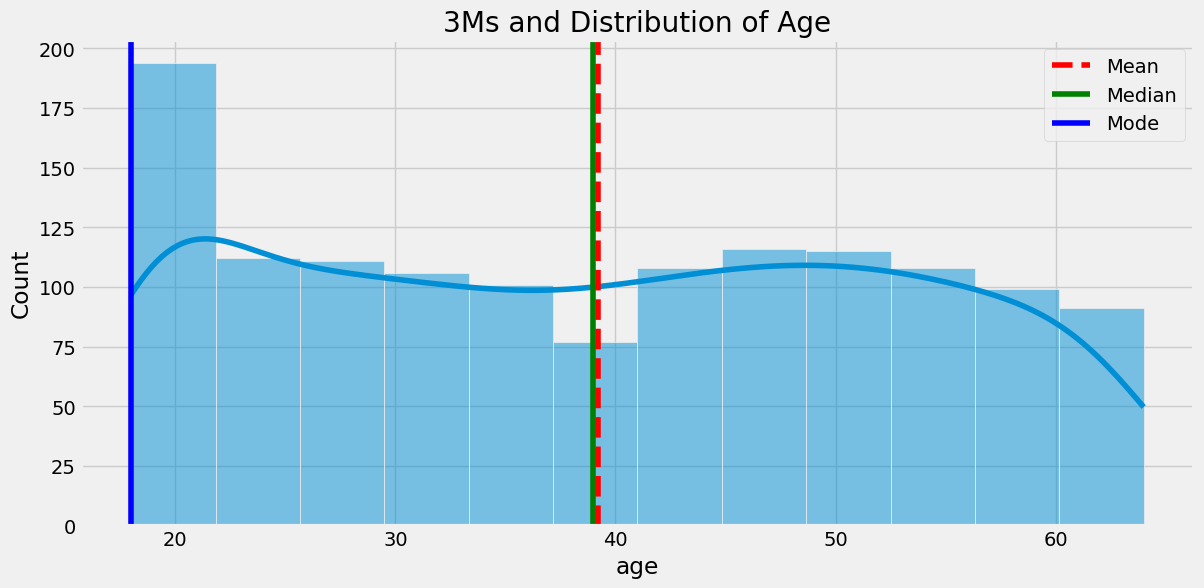

In [49]:
# Distribution of 'Age' alongwith measure of CT (3Ms)
age_mean            = insurance_dt['age'].mean()
age_median          = insurance_dt['age'].median()
age_mode            = insurance_dt['age'].mode()

fig, ax_hist        = plt.subplots(figsize = (12.8, 6))
ax_hist             = sns.histplot(insurance_dt['age'], kde=True)

ax_hist.axvline(age_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(age_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(age_mode[0], color = 'b', linestyle = '-', label = 'Mode')

ax_hist.set_title('3Ms and Distribution of Age')

plt.legend(); plt.show()

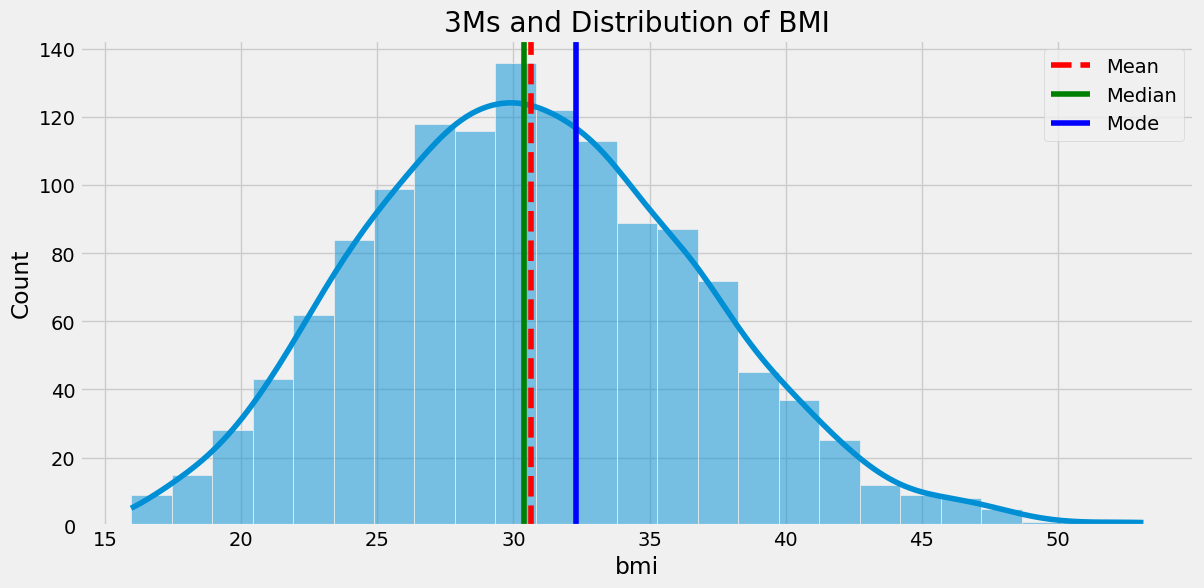

In [50]:
# Distribution of 'BMI' alongwith measure of CT (3Ms)
bmi_mean            = insurance_dt['bmi'].mean()
bmi_median          = insurance_dt['bmi'].median()
bmi_mode            = insurance_dt['bmi'].mode()

fig, ax_hist        = plt.subplots(figsize = (12.8, 6))
ax_hist             = sns.histplot(insurance_dt['bmi'], kde=True)

ax_hist.axvline(bmi_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(bmi_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(bmi_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('3Ms and Distribution of BMI')

plt.legend(); plt.show()

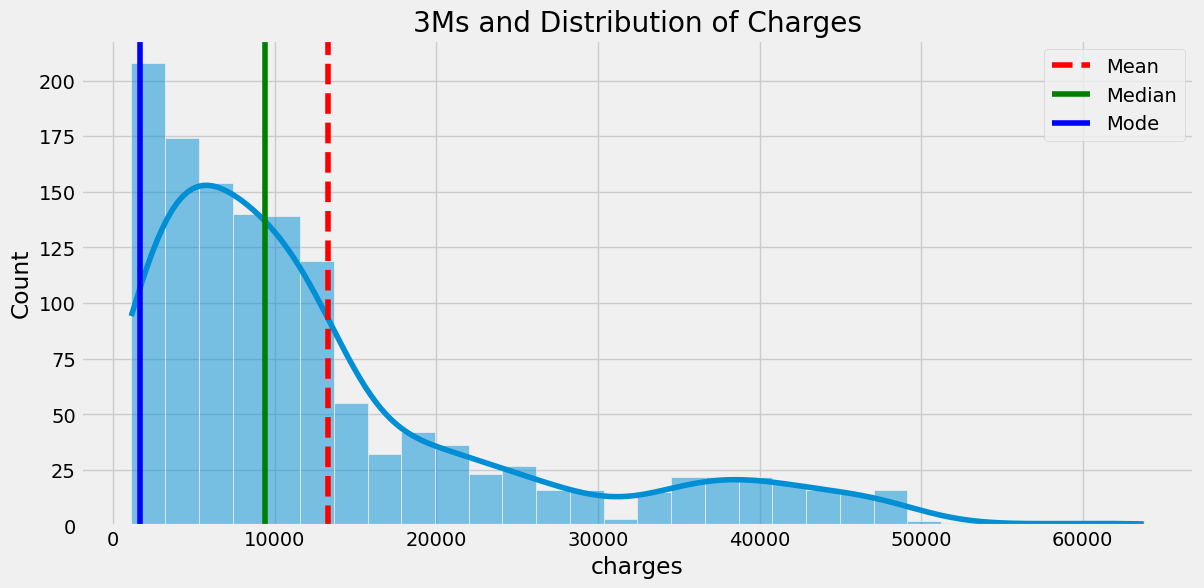

In [51]:
# Distribution of 'Charges' alongwith measure of CT (3Ms)
charges_mean        = insurance_dt['charges'].mean()
charges_median      = insurance_dt['charges'].median()
charges_mode        = insurance_dt['charges'].mode()

fig, ax_hist        = plt.subplots(figsize = (12.8, 6))
ax_hist             = sns.histplot(insurance_dt['charges'], kde=True)

ax_hist.axvline(charges_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(charges_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(charges_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('3Ms and Distribution of Charges')

plt.legend(); plt.show()

### Measure of skewness
Skewness is a measure of extent to which a distribution differs from a normal distribution.

The rule of thumb I would use here:
* If the skewness is between -0.5 and 0.5, the data are **fairly symmetrical**
* If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are **moderately skewed**
* If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are **highly skewed**

Determining skewness of `age`, `bmi` and `charges` columns and ploting the results after fitting a norm distribution

In [52]:
# Measure of Skewness and kurtosis for 'age', 'bmi' and 'charges' columns
print("Skewness of 'Age': {}\n".format(insurance_dt['age'].skew().round(4)))

print("Skewness of 'BMI': {}\n".format(insurance_dt['bmi'].skew().round(4)))

print("Skewness of 'Charges': {}\n".format(insurance_dt['charges'].skew().round(4)))

Skewness of 'Age': 0.0557

Skewness of 'BMI': 0.284

Skewness of 'Charges': 1.5159



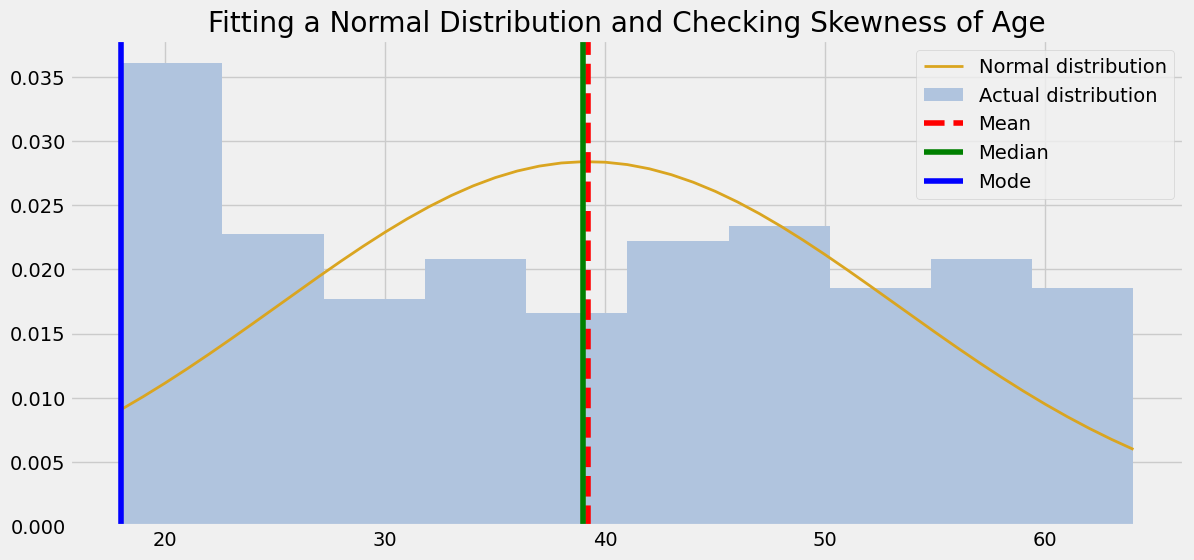

In [53]:
# Fitting a normal distribution and ploting the result
h = np.asarray(insurance_dt['age'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
fig, ax_hist = plt.subplots(figsize = (12.8, 6))
plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

ax_hist.axvline(age_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(age_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(age_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('Fitting a Normal Distribution and Checking Skewness of Age')

plt.legend(); plt.show()

In [54]:
age_skewness = skew_stats(insurance_dt['age'])
print("Skewness of Age: {}".format(round(age_skewness, 4)))

Skewness of Age: 0.0556


We can see in the above graph that **`age`** is **positively (right, Mode < Median < Mean) skewed** with **skewness score 0.056 (fairly symmetrical)**.

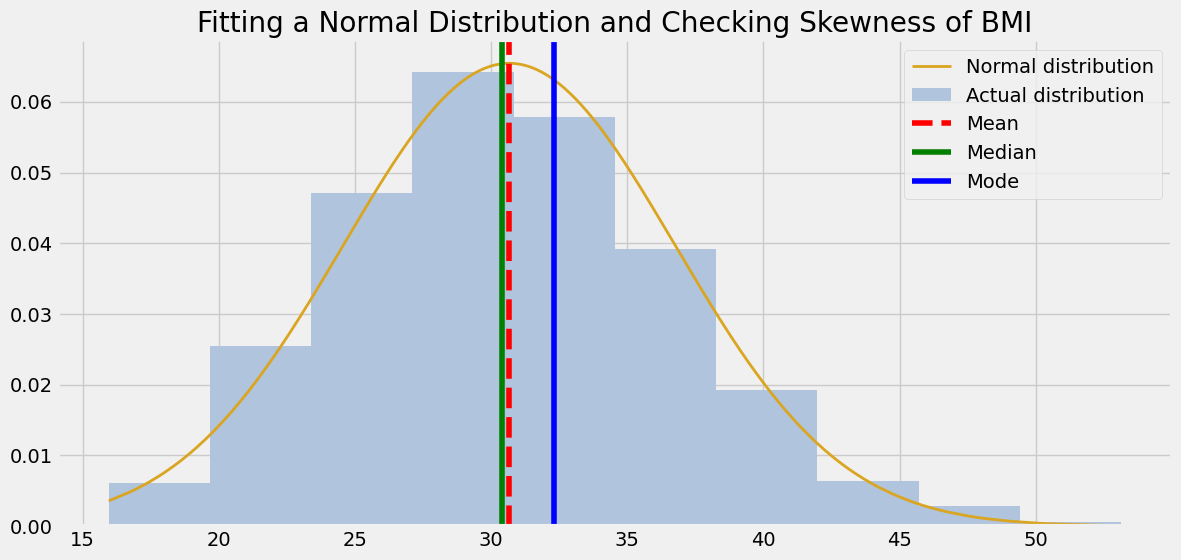

In [55]:
# Fitting a normal distribution and ploting the result
h = np.asarray(insurance_dt['bmi'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
fig, ax_hist = plt.subplots(figsize = (12.8, 6))
plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

ax_hist.axvline(bmi_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(bmi_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(bmi_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('Fitting a Normal Distribution and Checking Skewness of BMI')

plt.legend(); plt.show()

In [56]:

bmi_skewness = skew_stats(insurance_dt['bmi'])
print("Skewness of BMI: {}".format(round(bmi_skewness, 4)))

Skewness of BMI: 0.2837


We can see in the above graph that **`bmi`** is **positively (right, median < mean)** skewed with **skewness score 0.284 (fairly symmetrical)**.

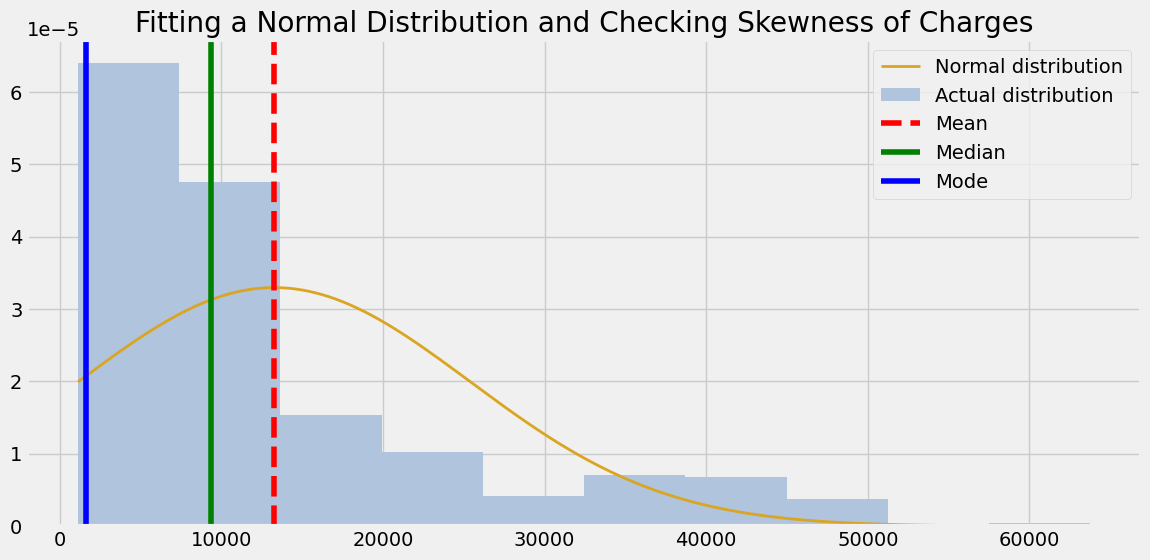

In [57]:
# Fitting a normal distribution and ploting the result
h = np.asarray(insurance_dt['charges'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
fig, ax_hist = plt.subplots(figsize = (12.8, 6))
plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

ax_hist.axvline(charges_mean, color = 'r', linestyle = '--', label = 'Mean')
ax_hist.axvline(charges_median, color = 'g', linestyle = '-', label = 'Median')
ax_hist.axvline(charges_mode[0], color = 'b', linestyle = '-', label = 'Mode')
ax_hist.set_title('Fitting a Normal Distribution and Checking Skewness of Charges')

plt.legend(); plt.show()

In [58]:

charges_skewness = skew_stats(insurance_dt['charges'])
print("Skewness of Charges: {}".format(round(charges_skewness, 4)))

Skewness of Charges: 1.5142


We can see in the above graph that **`charges`** is **positively (right, mode < median < mean)** skewed with **skewness score 1.514 (highly skewed)**.